In [2]:
import pandas as pd
olympic_games = pd.read_csv("heptathlon2016.csv")


best_athlete_per_category = []

# Make a dictionary of what is considered to be first place in each category
best_category = {
    "hurdles" : "min",
    "highjump" : "max",
    "shotput" : "max",
    "run200m" : "min",
    "longjump" : "max",
    "javelin" : "max",
    "run800m" : "min"
}

result = olympic_games.agg(best_category)

# Find the person who did best in each sport
for column, operation in best_category.items():
    best_athlete_per_category.append(olympic_games[olympic_games[column] == result[column]].Name.values[0])

olympic_games_summary_stats = olympic_games.describe()

# Append the best athletes
olympic_games_summary_stats.loc["Best Athlete"] = best_athlete_per_category

# Reorder rows to move "Best Athlete" to the top
olympic_games_summary_stats = olympic_games_summary_stats.reindex(["Best Athlete"] + olympic_games_summary_stats.index.tolist())

olympic_games_summary_stats = olympic_games_summary_stats.drop("count")

events = olympic_games.drop('Name', axis=1).columns.tolist()



In [3]:
olympic_games

,Name,hurdles,highjump,shotput,run200m,longjump,javelin,run800m
0,Thiam,13.56,1.98,14.91,25.10,6.58,53.13,136.5
1,Ennis-Hill,12.84,1.89,13.86,23.49,6.34,46.06,129.1
2,Theisen Eaton,13.18,1.86,13.45,24.18,6.48,47.36,129.5
3,Ikauniece-Admidina,13.33,1.77,13.52,23.76,6.12,55.93,129.4
4,Schafer,13.12,1.83,14.57,23.99,6.20,47.99,136.5
5,Johnson-Thompson,13.48,1.98,11.68,23.26,6.51,36.36,130.5
6,Rodriguez,13.61,1.86,13.69,24.26,6.25,48.89,134.7
7,Zsivoczky-Farkas,13.79,1.86,14.39,25.38,6.31,48.07,131.8
8,Oeser,13.69,1.86,14.28,24.99,6.10,47.22,133.8
9,Vetter,13.47,1.77,14.78,23.93,6.10,48.42,137.7


In [10]:
from pandas.io.formats.style import Styler
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import numpy as np

hept = pd.read_csv("heptathlon2016.csv", index_col="Name")
scaler = StandardScaler()
scaler.fit(hept)
hept_sc=scaler.transform(hept)

pca=PCA()
pca.fit(hept_sc)

p = pca.fit_transform(hept_sc)
pc2_scores = p[:,1]

# Get indices of two athletes with the lowest PCA scores
highest_pc2_indices = pc2_scores.argsort()[-2:]

# Access the original data set that match the index
highest_pc2_athletes = hept.iloc[highest_pc2_indices]

pca_scores = pd.DataFrame(pca.components_,columns=events)
# Define a function to apply custom styling
def style_negative_red_positive_green(val: float) -> str:
    color = 'red' if val < -0.15 else 'green' if val > 0.15 else 'white'
    return f'color: {color}'

# Apply the custom styling to the DataFrame
styled_df: Styler = pca_scores.style.map(style_negative_red_positive_green)

# Display the styled DataFrame in Jupyter Notebook
pca_scores

,hurdles,highjump,shotput,run200m,longjump,javelin,run800m
0,0.416418,-0.352441,0.201539,0.514785,-0.470443,0.325853,0.263181
1,-0.222418,0.457235,0.652021,0.058574,0.215549,0.503954,0.111690
2,-0.450796,0.049474,-0.091908,0.003667,-0.168603,-0.238732,0.836932
3,-0.476031,-0.498465,0.058151,-0.459664,-0.341901,0.404701,-0.171976
4,0.180852,0.491247,0.187260,-0.326221,-0.716691,-0.236772,-0.121552
5,0.506612,-0.263345,0.321127,-0.602533,0.270481,-0.078081,0.358565
6,0.240709,0.324242,-0.619866,-0.225378,-0.009688,0.597425,0.211865


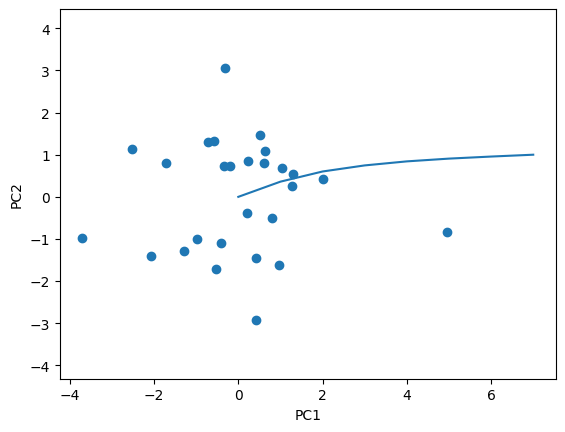

In [42]:
cumexp=np.concatenate([[0],pca.explained_variance_ratio_])
plt.plot(np.cumsum(cumexp))
plt.xlabel("number of components")
plt.ylabel("cumulative variance")

# # Calculate the differences (derivatives)
# derivative = np.diff(np.cumsum(cumexp))
# 
# # Create a list of the component numbers (x-axis values)
# component_numbers = np.arange(1, len(cumexp))
# 
# # Plot the cumulative variance and the derivative
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(np.cumsum(cumexp))
# plt.xlabel("Number of components")
# plt.ylabel("Cumulative variance")
# plt.title("Cumulative Variance Explained")
# 
# plt.subplot(1, 2, 2)
# plt.plot(component_numbers, derivative)
# plt.xlabel("Number of components")
# plt.ylabel("Derivative (Rate of Change)")
# plt.title("Rate of Change of Cumulative Variance")
# 
# plt.tight_layout()  # Adjust subplot spacing for a cleaner plot

plt.scatter(x=p[:,0],y=p[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("equal")
plt.show()


In [5]:
highest_pc2_athletes

,hurdles,highjump,shotput,run200m,longjump,javelin,run800m
Name,,,,,,,
Ida,13.37,1.77,14.88,25.07,6.43,48.76,140.4
Thiam,13.56,1.98,14.91,25.10,6.58,53.13,136.5


In [8]:
hept

,hurdles,highjump,shotput,run200m,longjump,javelin,run800m
Name,,,,,,,
Thiam,13.56,1.98,14.91,25.10,6.58,53.13,136.5
Ennis-Hill,12.84,1.89,13.86,23.49,6.34,46.06,129.1
Theisen Eaton,13.18,1.86,13.45,24.18,6.48,47.36,129.5
Ikauniece-Admidina,13.33,1.77,13.52,23.76,6.12,55.93,129.4
Schafer,13.12,1.83,14.57,23.99,6.20,47.99,136.5
Johnson-Thompson,13.48,1.98,11.68,23.26,6.51,36.36,130.5
Rodriguez,13.61,1.86,13.69,24.26,6.25,48.89,134.7
Zsivoczky-Farkas,13.79,1.86,14.39,25.38,6.31,48.07,131.8
Oeser,13.69,1.86,14.28,24.99,6.10,47.22,133.8


{'whiskers': [<matplotlib.lines.Line2D at 0x20b05212390>,
 'caps': [<matplotlib.lines.Line2D at 0x20b05213450>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b05211b10>],
 'medians': [<matplotlib.lines.Line2D at 0x20b05218590>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b05218e50>],
 'means': []}

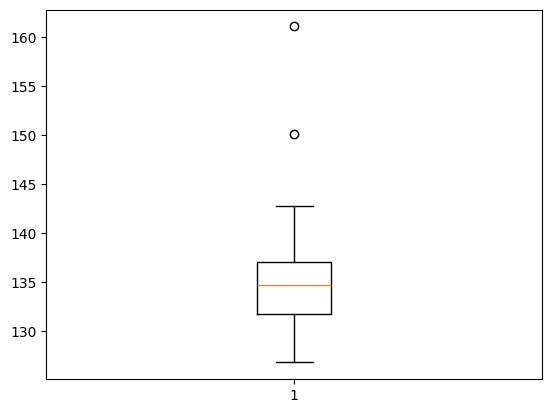

In [24]:
plt.boxplot(hept["run800m"])


In [34]:
import pandas as pd
import numpy as np
from copy import deepcopy

# Assuming you have a DataFrame 'df' with a 'run800m' column
# Define your percentile values (e.g., 1st and 99th percentile)
hept_copy = deepcopy(hept)
lower_percentile = hept_copy['run800m'].quantile(0.01)
upper_percentile = hept_copy['run800m'].quantile(0.97)

# Apply winsorizing to the 'run800m' column
hept_copy['run800m'] = np.where(hept_copy['run800m'] < lower_percentile, lower_percentile, hept_copy['run800m'])
hept_copy['run800m'] = np.where(hept_copy['run800m'] > upper_percentile, upper_percentile, hept_copy['run800m'])


# Now, the 'run800m' column in your DataFrame 'df' has been winsorized
scaler_copy = StandardScaler()
scaler_copy.fit(hept_copy)
hept_sc_copy=scaler_copy.transform(hept_copy)

pca_copy = PCA()
pca_copy.fit(hept_sc_copy)

p_copy = pca_copy.fit_transform(hept_sc_copy)

pd.DataFrame(pca_copy.components_,columns=events)

,hurdles,highjump,shotput,run200m,longjump,javelin,run800m
0,0.399515,-0.345350,0.192253,0.504970,-0.464018,0.315773,0.337846
1,-0.209918,0.453905,0.656077,0.060612,0.216607,0.514448,0.064949
2,-0.545969,0.072856,-0.085643,-0.036527,-0.164979,-0.203431,0.786981
3,-0.416800,-0.521163,0.067792,-0.470510,-0.323626,0.422031,-0.214120
4,0.182914,0.476154,0.199093,-0.324149,-0.722033,-0.241484,-0.124348
5,0.490616,-0.223065,0.298552,-0.604698,0.290021,-0.085623,0.404106
6,0.224401,0.348287,-0.626019,-0.218827,-0.019285,0.592023,0.194145


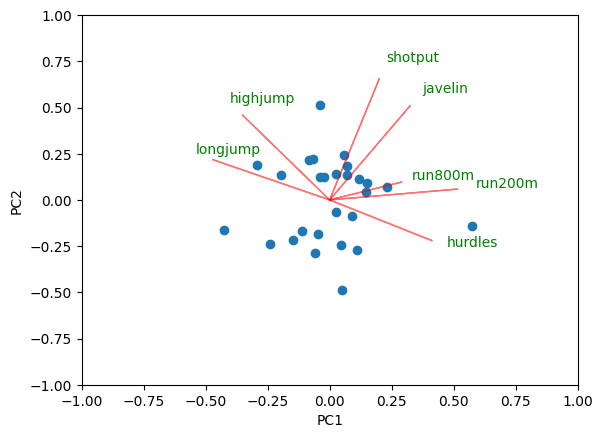

In [44]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC1")
plt.ylabel("PC2")
x=p[:,0]
y=p[:,1]
coeff=np.transpose(pca.components_[0:2,:])
n=hept.shape[1]
scalex=1.0/(x.max()-x.min())
scaley=1.0/(y.max()-y.min())
plt.scatter(x*scalex,y*scaley)
for i in range(n):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color="r",alpha=0.5)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,events[i],color="g")